In [6]:
import numpy as np
#from skmisc.loess import loess
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

Now, we can load the data at data.csv and turn it into the predictor X and the target y

In [7]:
# X is contained in the first column of the data, y in the second.
data = pd.read_csv("data.csv", header=None)
X = data[0].copy()
X = X.values.reshape(-1,1)
y = data[1].copy()
y = y.values.reshape(-1,1)
print(X)

[[0.00820661]
 [0.01415325]
 [0.01559572]
 [0.02442135]
 [0.03685233]
 [0.05088775]
 [0.08889759]
 [0.0962383 ]
 [0.09843139]
 [0.1059354 ]
 [0.11651222]
 [0.13070497]
 [0.13104941]
 [0.15278595]
 [0.15533458]
 [0.15694718]
 [0.15822414]
 [0.16184151]
 [0.16440562]
 [0.170997  ]
 [0.17141874]
 [0.17354542]
 [0.19450431]
 [0.20104861]
 [0.20765417]
 [0.23977035]
 [0.24857417]
 [0.24899301]
 [0.25767169]
 [0.28267198]
 [0.29306876]
 [0.29976211]
 [0.32043283]
 [0.3524293 ]
 [0.35525169]
 [0.36407193]
 [0.36537848]
 [0.37684418]
 [0.38077052]
 [0.39109363]
 [0.3929666 ]
 [0.3940909 ]
 [0.40028943]
 [0.41152754]
 [0.41302547]
 [0.42052407]
 [0.49129585]
 [0.49497494]
 [0.49695607]
 [0.49727872]
 [0.51233274]
 [0.51746672]
 [0.51917215]
 [0.52668048]
 [0.53779525]
 [0.53994602]
 [0.54030912]
 [0.5446737 ]
 [0.5476253 ]
 [0.55170556]
 [0.56638075]
 [0.57810362]
 [0.58471775]
 [0.64379156]
 [0.65048759]
 [0.66095262]
 [0.67277254]
 [0.68698632]
 [0.69558141]
 [0.7288262 ]
 [0.73222339]
 [0.76

Create a scatterplot of the data. 

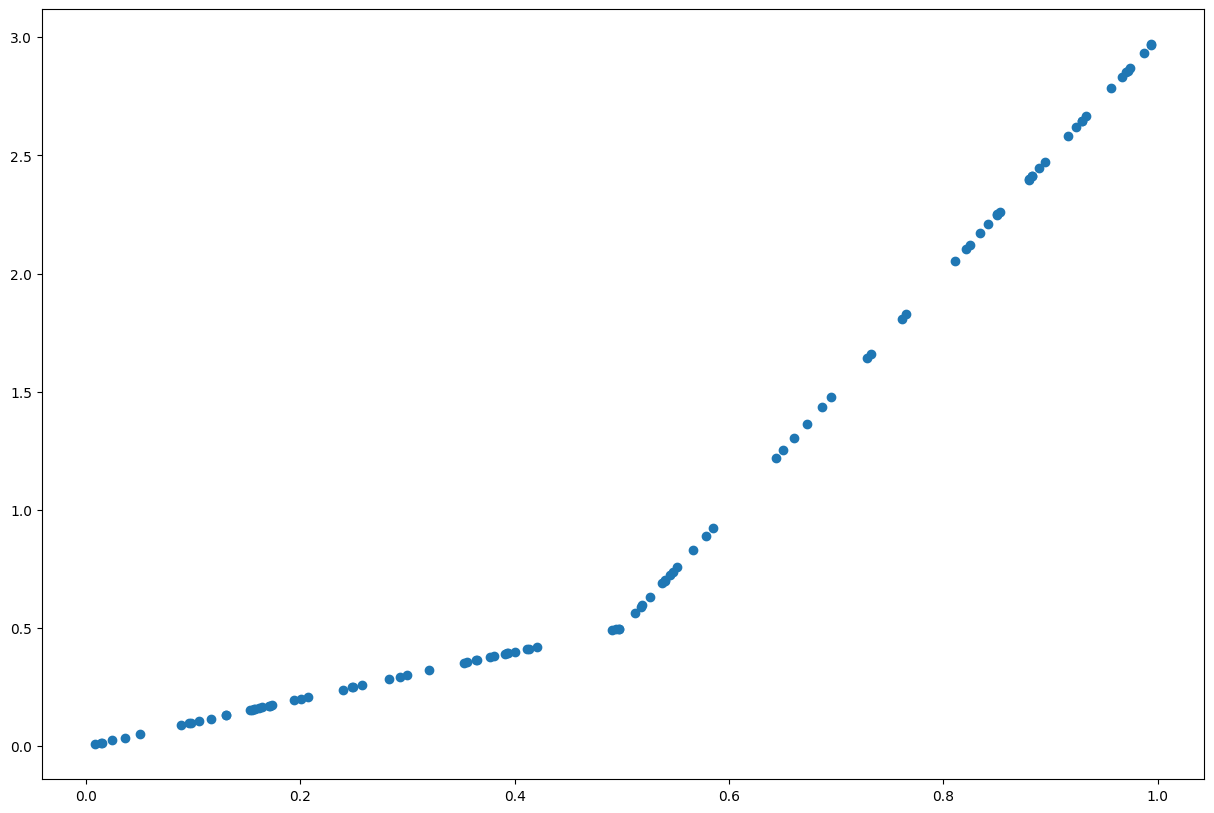

In [8]:
plt.scatter(X, y)

We now define the kernels $K_1,...,K_4$ as

In [9]:
def K1(x, x_):
    return 1

def K2(x, x_, lam):
    return (1-abs((x-x_)/lam)**3)**3

def K3(x, x_, lam):
    return np.exp(-lam * abs(x-x_)**2)

def K4(x, x_, L):
    checker = False
    for l in range(L):
        if not ((l-1)/L <= x and x_ < l/L):
            return 0
    return 1

To write the function which takes $X, y$ and a kernel $K$ as input, we can do the following

In [13]:
def pred(X, y, K):
    from sklearn.metrics.pairwise import pairwise_kernels
    # Start by computing the matrix of all weights we'll need at once.
    weights = pairwise_kernels(X, y, n_jobs=-1)
    # Now, for each point we can compute the model using the corresponding weights, and make a prediction.
    return print(weights)
    return y_hat
pred(X, y, 1)
from sklearn import svm


[[6.73485277e-05 1.16150235e-04 1.27988106e-04 ... 2.40813726e-02
  2.43420207e-02 2.43723753e-02]
 [1.16150235e-04 2.00314358e-04 2.20730120e-04 ... 4.15310800e-02
  4.19805973e-02 4.20329473e-02]
 [1.27988106e-04 2.20730120e-04 2.43226627e-04 ... 4.57638700e-02
  4.62592016e-02 4.63168870e-02]
 ...
 [8.09892047e-03 1.39675142e-02 1.53910639e-02 ... 2.89587803e+00
  2.92722197e+00 2.93087222e+00]
 [8.15105009e-03 1.40574177e-02 1.54901302e-02 ... 2.91451768e+00
  2.94606336e+00 2.94973711e+00]
 [8.15712100e-03 1.40678877e-02 1.55016673e-02 ... 2.91668841e+00
  2.94825759e+00 2.95193408e+00]]


To actually use this function and show the fits of each kernel, we can iterate over all the kernels and fit the LOESS model for each of them.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


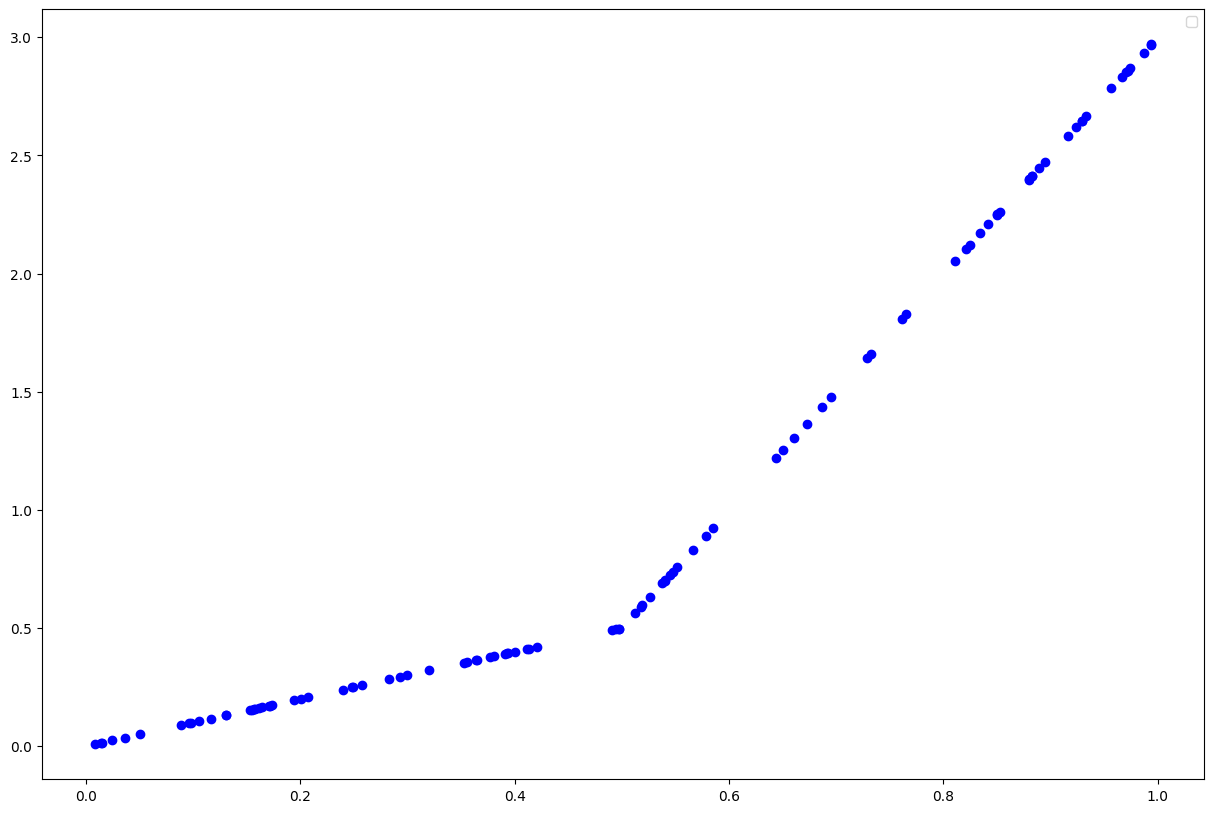

In [72]:
from functools import partial # You may want to use this to make your life easier.
plt.scatter(X, y, c='b')
for kernel in [K1, K2, K3, K4]:
    pass
    
# Adding a legend so we know which kernel produced what is good style.
plt.legend()

We see...